In [112]:
# Import the modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

from sklearn.ensemble import VotingClassifier

In [113]:
# Read the training and testing datasets.
train_df = pd.read_csv("PycharmProjects/pythonProject/Dataset/EnzymeDataset/train.csv", encoding="utf8", index_col="id")
test_df = pd.read_csv("PycharmProjects/pythonProject/Dataset/EnzymeDataset/test.csv", encoding="utf8", index_col="id")
train_df.shape, test_df.shape

((14838, 37), (9893, 31))

In [114]:
# read the training data
train_df.head(5)

,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,EState_VSA2,...,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2,EC1,EC2,EC3,EC4,EC5,EC6
id,,,,,,,,,,,,,,,,,,,,,
0,323.390782,9.879918,5.875576,5.875576,4.304757,4.304757,2.754513,1.749203,0.000000,11.938294,...,4.794537,35.527357,0,0,1,1,0,0,0,0
1,273.723798,7.259037,4.441467,5.834958,3.285046,4.485235,2.201375,1.289775,45.135471,0.000000,...,13.825658,44.707310,0,0,0,1,1,0,0,0
2,521.643822,10.911303,8.527859,11.050864,6.665291,9.519706,5.824822,1.770579,15.645394,6.606882,...,17.964475,45.660120,0,0,1,1,0,0,1,0
3,567.431166,12.453343,7.089119,12.833709,6.478023,10.978151,7.914542,3.067181,95.639554,0.000000,...,31.961948,87.509997,0,0,1,1,0,0,0,0
4,112.770735,4.414719,2.866236,2.866236,1.875634,1.875634,1.036450,0.727664,17.980451,12.841643,...,9.589074,33.333333,2,2,1,0,1,1,1,0


In [115]:
# Read the testing data
test_df.head(5)

,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,EState_VSA2,...,PEOE_VSA14,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2
id,,,,,,,,,,,,,,,,,,,,,
14838,344.632371,7.283603,4.473966,5.834958,3.412257,4.651530,2.096558,1.116433,49.458581,0.000000,...,13.512441,0.000000,0.000000,0.000000,26.809272,24.539800,4.794537,47.304082,1,1
14839,1432.410201,10.663869,7.079026,8.065215,5.297097,5.297097,3.924155,2.569694,0.000000,29.783175,...,0.000000,34.947374,98.323987,9.606882,0.000000,53.378235,0.000000,43.166667,0,0
14840,83.352608,3.931852,1.774215,1.774215,1.073446,1.073446,0.467830,0.170838,5.969305,6.420822,...,5.969305,0.000000,0.000000,6.420822,11.752550,13.344559,9.589074,24.666667,1,1
14841,150.255712,5.912790,3.548812,3.548812,2.595128,2.595128,1.642813,0.694113,0.000000,0.000000,...,59.935299,0.000000,0.000000,0.000000,17.744066,32.290168,4.794537,26.778866,0,0
14842,1817.276351,24.910940,15.540529,20.047314,12.535886,17.730988,11.979618,4.431173,84.554972,47.360206,...,23.468091,25.609359,0.000000,37.099000,69.141353,38.704130,50.697492,102.583333,0,0


In [116]:
# Checking for null / nan values
print(train_df.isna().sum())
print()
print(test_df.isna().sum())

BertzCT              0
Chi1                 0
Chi1n                0
Chi1v                0
Chi2n                0
Chi2v                0
Chi3v                0
Chi4n                0
EState_VSA1          0
EState_VSA2          0
ExactMolWt           0
FpDensityMorgan1     0
FpDensityMorgan2     0
FpDensityMorgan3     0
HallKierAlpha        0
HeavyAtomMolWt       0
Kappa3               0
MaxAbsEStateIndex    0
MinEStateIndex       0
NumHeteroatoms       0
PEOE_VSA10           0
PEOE_VSA14           0
PEOE_VSA6            0
PEOE_VSA7            0
PEOE_VSA8            0
SMR_VSA10            0
SMR_VSA5             0
SlogP_VSA3           0
VSA_EState9          0
fr_COO               0
fr_COO2              0
EC1                  0
EC2                  0
EC3                  0
EC4                  0
EC5                  0
EC6                  0
dtype: int64

BertzCT              0
Chi1                 0
Chi1n                0
Chi1v                0
Chi2n                0
Chi2v               

In [117]:
# Drop unnecessary features such as EC3, EC4, EC5, EC6
train_df.drop(['EC3', 'EC4', 'EC5', 'EC6'], axis=1, inplace=True)
train_df

,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,EState_VSA2,...,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2,EC1,EC2
id,,,,,,,,,,,,,,,,,,,,,
0,323.390782,9.879918,5.875576,5.875576,4.304757,4.304757,2.754513,1.749203,0.000000,11.938294,...,0.000000,0.000000,17.744066,0.000000,4.794537,35.527357,0,0,1,1
1,273.723798,7.259037,4.441467,5.834958,3.285046,4.485235,2.201375,1.289775,45.135471,0.000000,...,0.000000,0.000000,7.822697,30.705892,13.825658,44.707310,0,0,0,1
2,521.643822,10.911303,8.527859,11.050864,6.665291,9.519706,5.824822,1.770579,15.645394,6.606882,...,53.378235,0.000000,15.645394,73.143616,17.964475,45.660120,0,0,1,1
3,567.431166,12.453343,7.089119,12.833709,6.478023,10.978151,7.914542,3.067181,95.639554,0.000000,...,0.000000,6.420822,15.645394,62.107304,31.961948,87.509997,0,0,1,1
4,112.770735,4.414719,2.866236,2.866236,1.875634,1.875634,1.036450,0.727664,17.980451,12.841643,...,19.386400,0.000000,11.938611,18.883484,9.589074,33.333333,2,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14833,632.207041,10.911303,6.579933,9.179964,4.653583,6.030052,3.670528,1.770579,32.971529,6.606882,...,13.847474,6.923737,34.407699,32.607024,18.947452,61.376610,0,0,1,1
14834,62.568425,2.642734,1.446898,1.446898,0.879497,0.879497,0.174620,0.000000,0.000000,0.000000,...,0.000000,6.066367,0.000000,6.420822,0.000000,10.000000,0,0,0,1
14835,981.327476,10.363081,6.146219,6.146219,4.700576,4.700576,3.064846,2.133897,17.248535,0.000000,...,0.000000,23.762553,10.969244,0.000000,0.000000,66.666667,0,0,1,1


In [118]:
# Correlation matrix, spearman is preferred
corr = train_df.corr()
corr

,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,EState_VSA2,...,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2,EC1,EC2
BertzCT,1.000000,0.927629,0.906521,0.922312,0.897368,0.919101,0.908613,0.818730,0.722450,0.664584,...,0.197128,0.667995,0.752372,0.696558,0.801567,0.860961,-0.199739,-0.201383,-0.060120,-0.024188
Chi1,0.927629,1.000000,0.973500,0.978411,0.960249,0.971049,0.960650,0.879138,0.752059,0.674461,...,0.233869,0.666387,0.758098,0.783187,0.822502,0.909979,-0.210490,-0.212507,-0.069660,-0.027768
Chi1n,0.906521,0.973500,1.000000,0.977010,0.983607,0.968451,0.965798,0.914214,0.697719,0.663377,...,0.308741,0.648963,0.706382,0.812716,0.765291,0.891629,-0.210949,-0.212956,-0.055030,-0.030101
Chi1v,0.922312,0.978411,0.977010,1.000000,0.962441,0.986538,0.970371,0.877441,0.745145,0.674537,...,0.236163,0.665717,0.770176,0.784626,0.830787,0.890286,-0.229709,-0.231550,-0.065679,-0.029933
Chi2n,0.897368,0.960249,0.983607,0.962441,1.000000,0.970987,0.971534,0.934039,0.684409,0.655004,...,0.327449,0.639612,0.685918,0.813634,0.749101,0.882566,-0.213130,-0.215159,-0.056264,-0.027566
Chi2v,0.919101,0.971049,0.968451,0.986538,0.970987,1.000000,0.980093,0.889549,0.741071,0.671543,...,0.243887,0.665266,0.761452,0.782354,0.826504,0.884350,-0.233122,-0.235016,-0.064649,-0.028716
Chi3v,0.908613,0.960650,0.965798,0.970371,0.971534,0.980093,1.000000,0.925856,0.717300,0.658281,...,0.283815,0.651354,0.724303,0.790831,0.792512,0.876660,-0.234348,-0.236115,-0.061797,-0.029776
Chi4n,0.818730,0.879138,0.914214,0.877441,0.934039,0.889549,0.925856,1.000000,0.593447,0.580768,...,0.392536,0.560305,0.567885,0.781454,0.637785,0.805501,-0.219958,-0.221581,-0.054333,-0.030007
EState_VSA1,0.722450,0.752059,0.697719,0.745145,0.684409,0.741071,0.717300,0.593447,1.000000,0.388525,...,-0.136838,0.451893,0.655484,0.573015,0.847151,0.802368,-0.091829,-0.093305,-0.173752,-0.012578
EState_VSA2,0.664584,0.674461,0.663377,0.674537,0.655004,0.671543,0.658281,0.580768,0.388525,1.000000,...,0.171933,0.677290,0.667695,0.448622,0.568868,0.619780,-0.096164,-0.097368,0.040751,-0.034391


In [119]:
# Feature Selection with strong correlation
corr_features = set()
for i in range(len(corr.columns)):
    for j in range(i):
        if (abs(corr.iloc[i, j]) > 0.8) or (abs(corr.iloc[i, j]) < -0.8):
            colname = corr.columns[i]
            corr_features.add(colname)
print(corr_features)

{'Chi1n', 'Chi2n', 'Chi4n', 'ExactMolWt', 'FpDensityMorgan3', 'Chi1', 'FpDensityMorgan2', 'HeavyAtomMolWt', 'SMR_VSA5', 'VSA_EState9', 'Chi1v', 'fr_COO2', 'SlogP_VSA3', 'SMR_VSA10', 'Chi3v', 'NumHeteroatoms', 'Chi2v'}


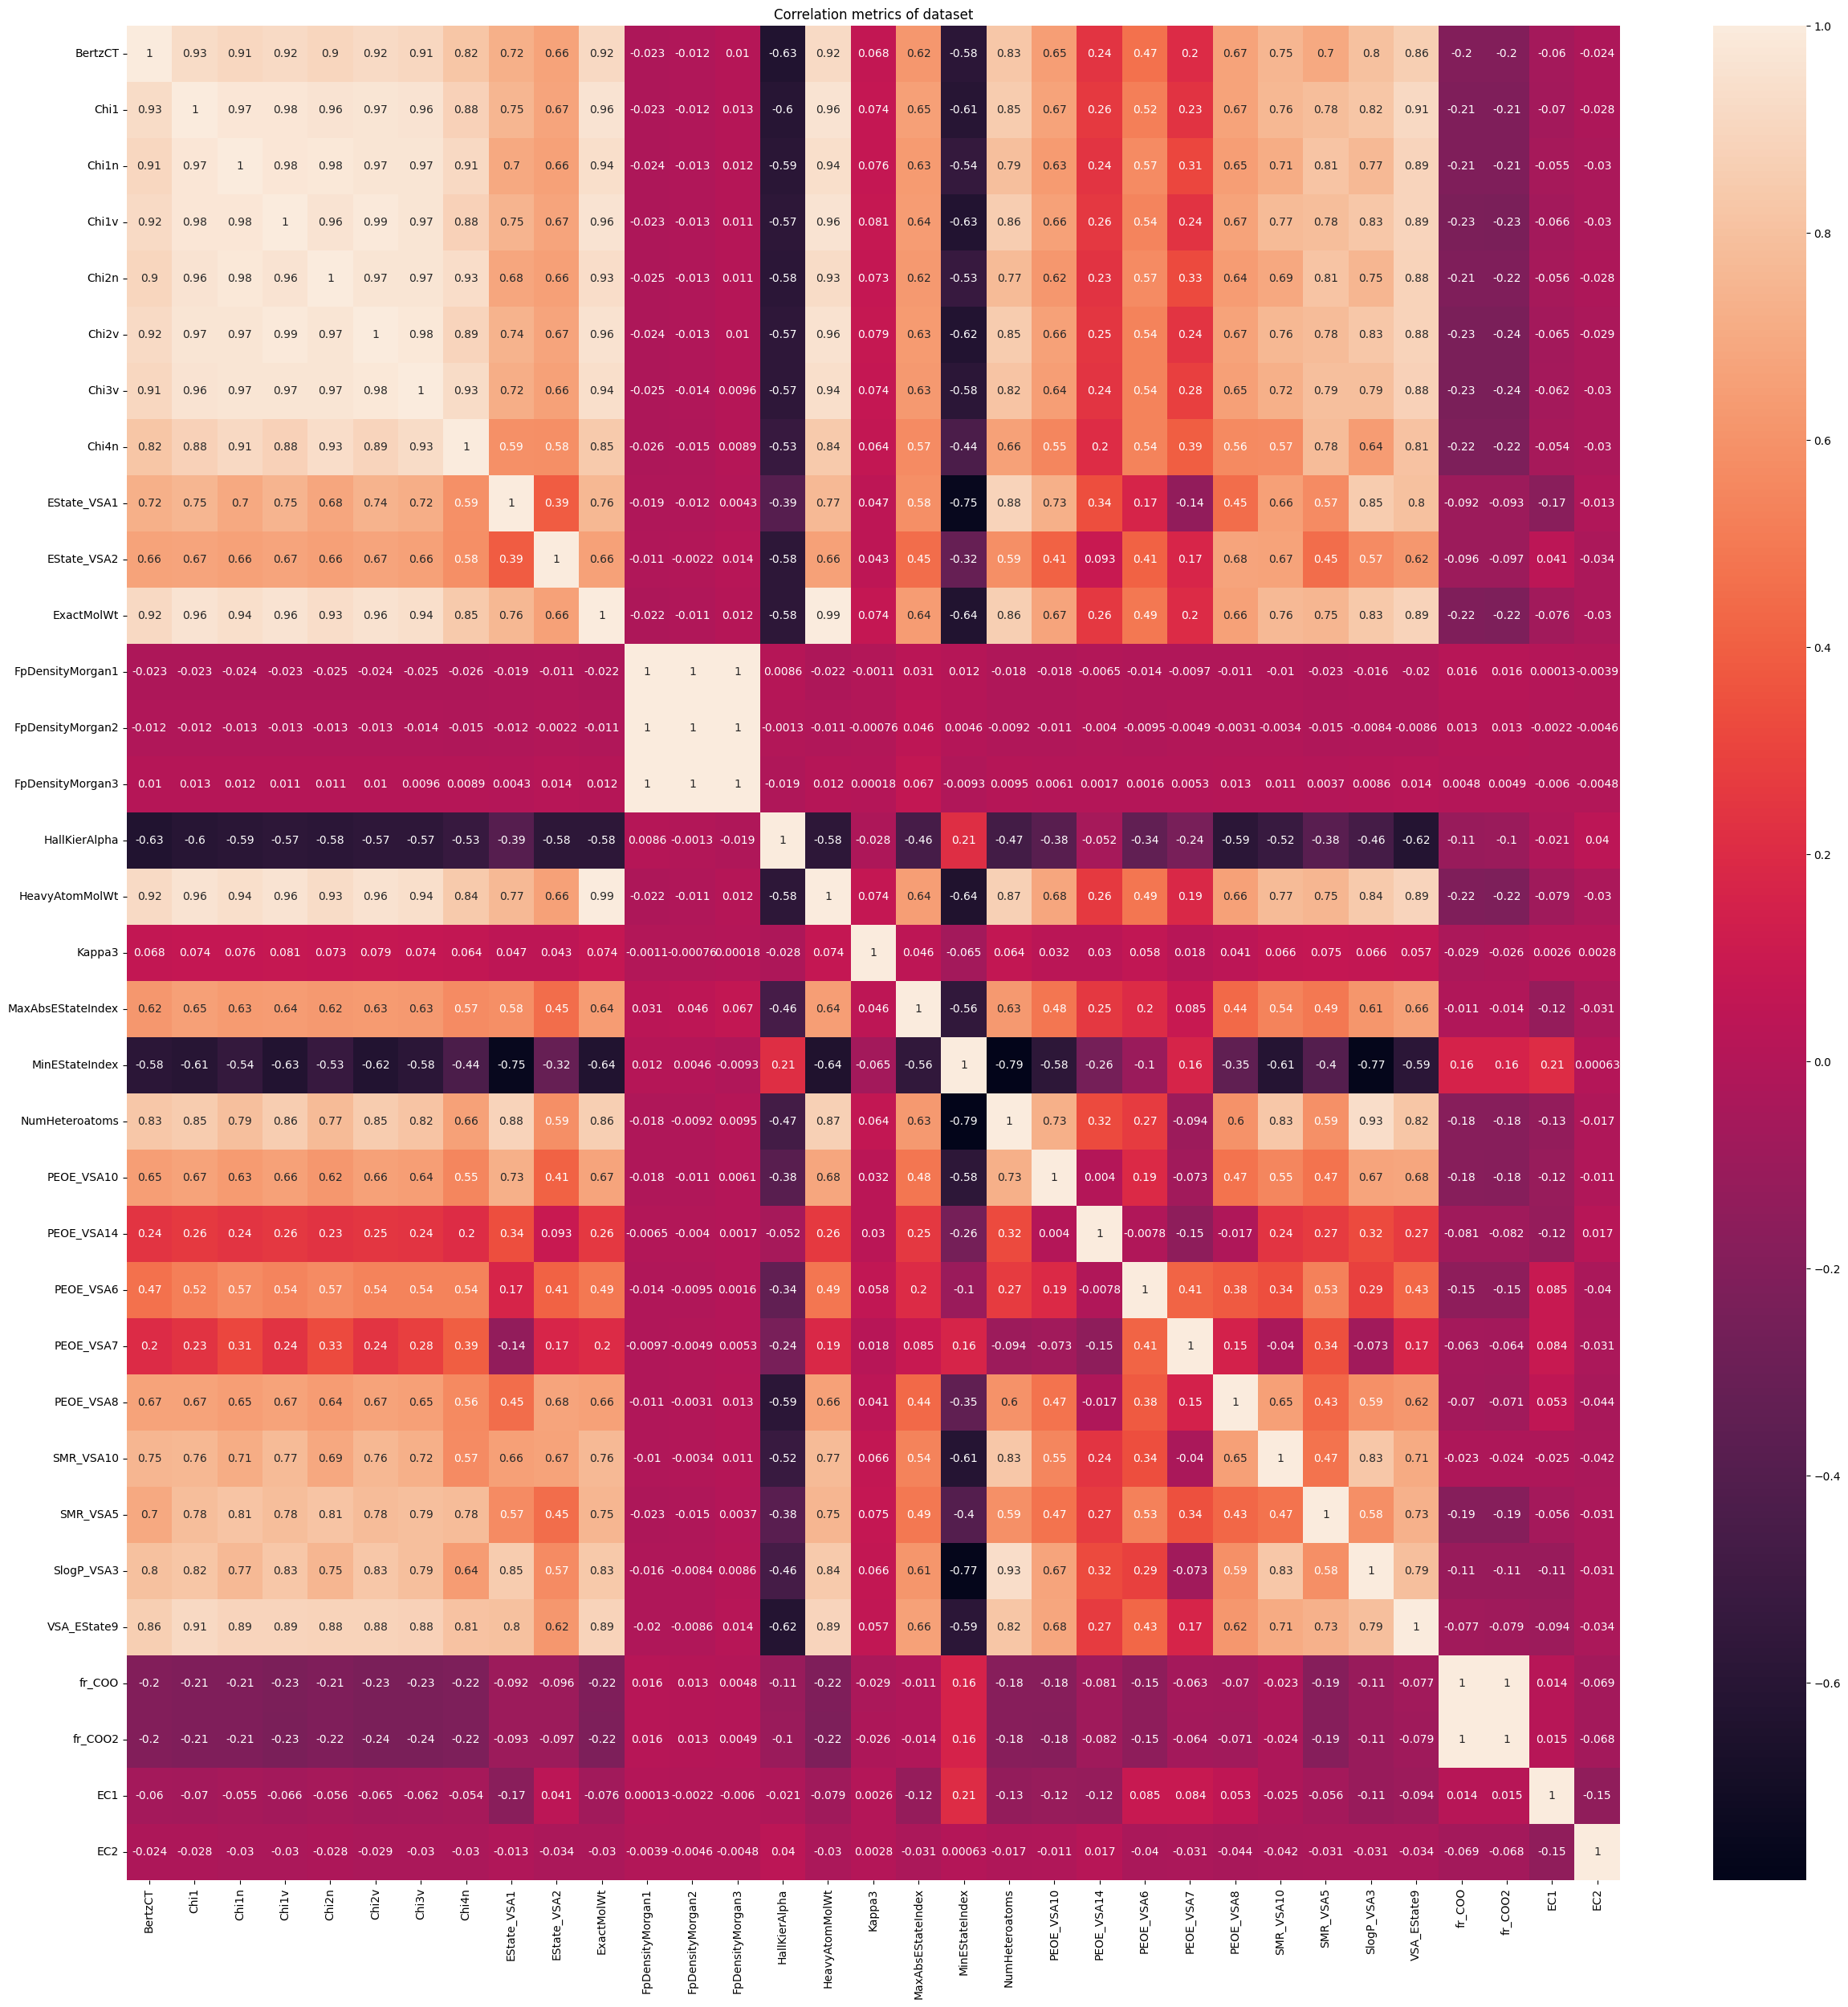

In [120]:
# Plot the correlation heatmap
plt.figure(figsize=(30, 30))
sns.heatmap(corr, annot=True)
plt.title("Correlation metrics of dataset")
plt.show()

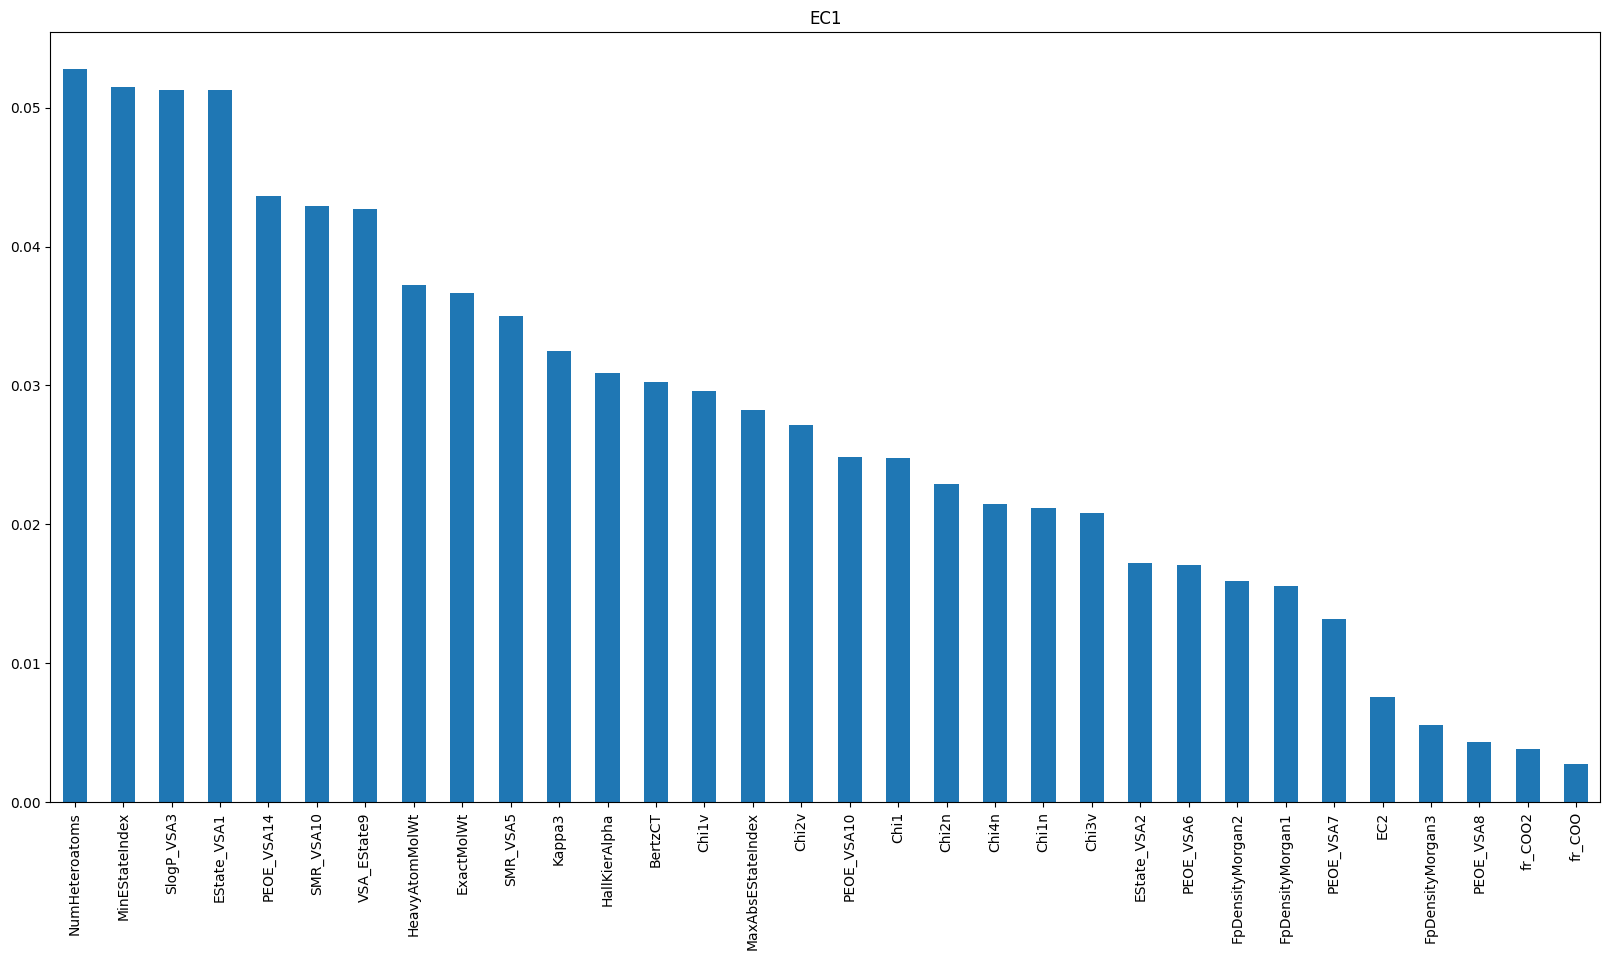

Index(['EState_VSA1', 'ExactMolWt', 'HeavyAtomMolWt', 'MinEStateIndex',
       'NumHeteroatoms', 'PEOE_VSA14', 'SMR_VSA10', 'SMR_VSA5', 'SlogP_VSA3',
       'VSA_EState9'],
      dtype='object')


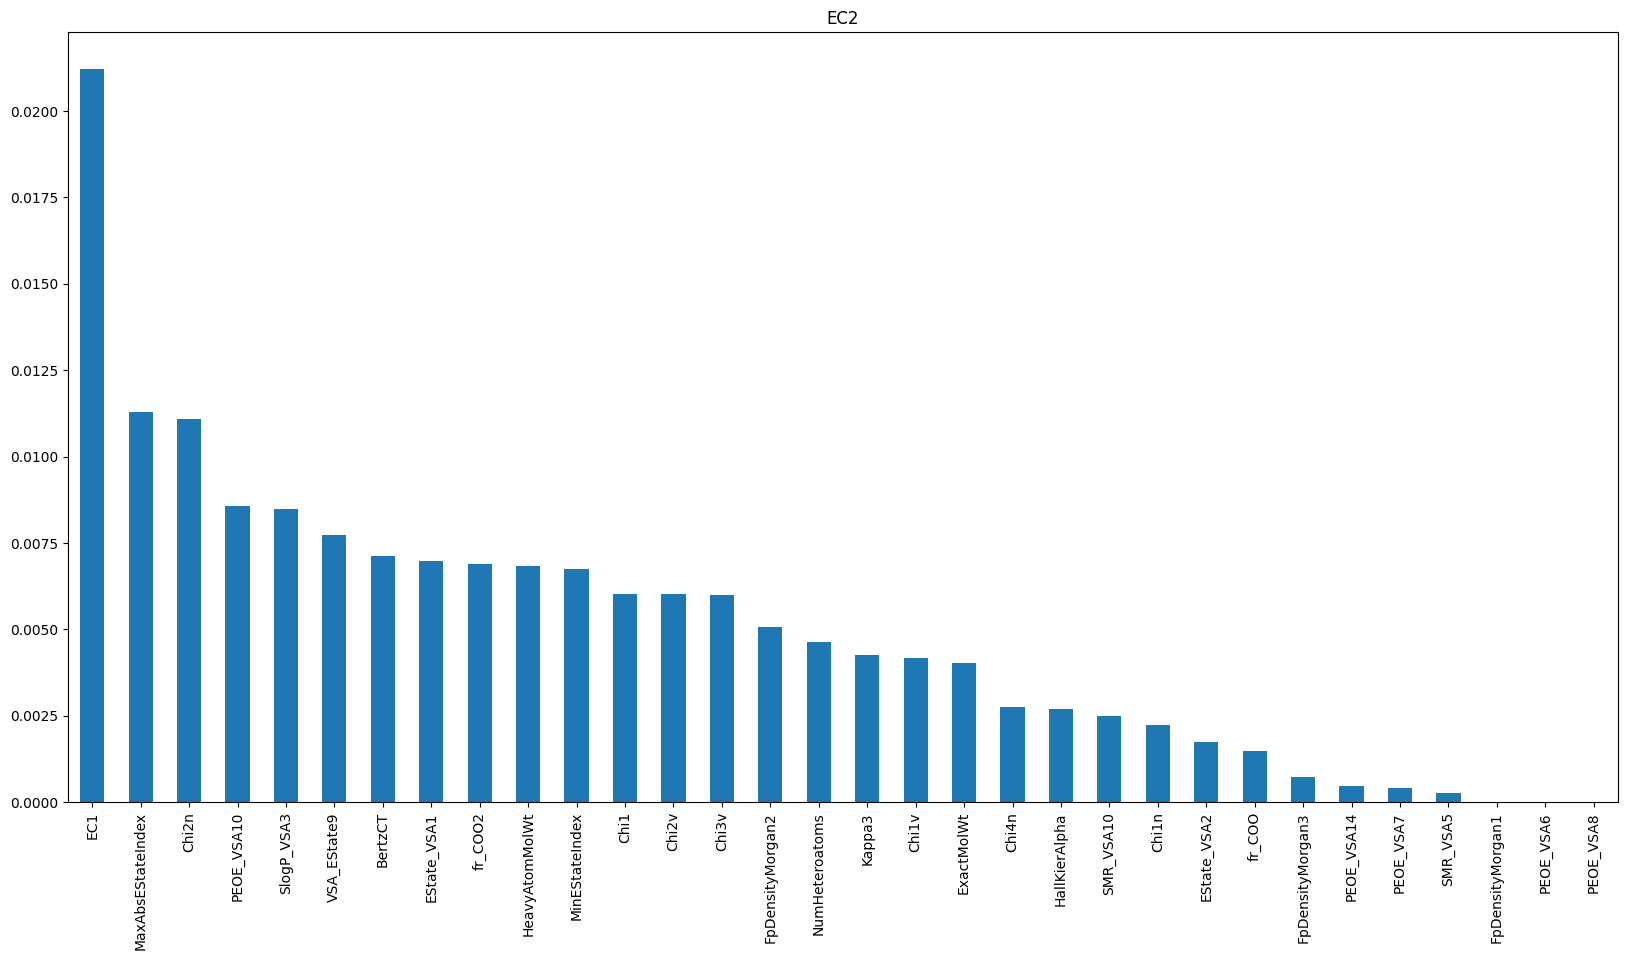

Index(['Chi1n', 'Chi2n', 'EState_VSA2', 'ExactMolWt', 'HallKierAlpha',
       'MinEStateIndex', 'PEOE_VSA8', 'SMR_VSA10', 'SlogP_VSA3', 'EC1'],
      dtype='object')


In [121]:
# Feature Selection with mutual information
dic = {}
select_k = 10  # Select 10 features
for i in ['EC1', 'EC2']:
    mutual_info = mutual_info_classif(train_df.drop([i], axis=1), train_df[i])
    mutual_info = pd.Series(mutual_info)
    mutual_info.index = train_df.drop([i], axis=1).columns
    columns = mutual_info.sort_values(ascending=False)
    columns.plot.bar(title=i, figsize=(20, 10))
    plt.show()
    selection = SelectKBest(mutual_info_classif, k=select_k)
    selection.fit(train_df.drop([i], axis=1), train_df[i])
    features = train_df.drop([i], axis=1).columns[selection.get_support()]
    print(features)

In [122]:
# Obtain the most important 10 features of EC1 and EC2
dic = {'EC1' : ['EState_VSA1', 'ExactMolWt', 'HeavyAtomMolWt', 'MinEStateIndex',
                'NumHeteroatoms', 'PEOE_VSA14', 'SMR_VSA10', 'SMR_VSA5', 'SlogP_VSA3',
                'VSA_EState9'],
       'EC2' : ['Chi1n', 'Chi2n', 'EState_VSA2', 'ExactMolWt', 'HallKierAlpha',
                'MinEStateIndex', 'PEOE_VSA8', 'SMR_VSA10', 'SlogP_VSA3', 'EC1']}

In [123]:
# Input the selected features
EC1_train, EC1_predict = train_df[dic['EC1']], train_df['EC1']
EC2_train, EC2_predict = train_df[dic['EC2']], train_df['EC2']

In [124]:
# Data Normalization with Standard Scaler
SC_EC1 = StandardScaler()
SC_EC2 = StandardScaler()
Scaled_EC1 = pd.DataFrame(SC_EC1.fit_transform(EC1_train), columns = dic['EC1'])
Scaled_EC2 = pd.DataFrame(SC_EC2.fit_transform(EC2_train), columns = dic['EC2'])
Scaled_EC1

,EState_VSA1,ExactMolWt,HeavyAtomMolWt,MinEStateIndex,NumHeteroatoms,PEOE_VSA14,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9
0,-0.920423,-0.313054,-0.295231,1.108894,-0.599739,2.133838,0.114897,-0.916535,-0.605725,-0.472430
1,0.502170,-0.144617,-0.131279,-1.311822,0.185241,-0.288402,-0.433863,-0.010637,0.012928,-0.157766
2,-0.427307,0.397148,0.372197,-1.425939,0.054411,-0.062054,-0.001182,1.241380,0.296446,-0.125107
3,2.093972,1.053558,1.086999,-1.527723,1.362710,0.102577,-0.001182,0.915782,1.255304,1.309393
4,-0.353710,-0.774526,-0.784751,0.214619,-0.599739,-0.169309,-0.206208,-0.359426,-0.277288,-0.547635
...,...,...,...,...,...,...,...,...,...,...
14833,0.118783,0.241551,0.273482,-1.431579,0.970220,-0.062054,1.036579,0.045451,0.363782,0.413612
14834,-0.920423,-0.969927,-0.963566,1.146842,-1.123058,-0.514750,-0.866544,-0.727105,-0.934161,-1.347439
14835,-0.376779,0.019818,0.034183,0.809965,-0.076419,-0.514750,-0.259824,-0.916535,-0.934161,0.594941
14836,0.517561,-0.118308,-0.083844,-0.997779,-0.207249,-0.288402,-0.433863,2.298082,-0.311558,-0.127739


In [125]:
# Split the training and testing dataset (EC1, EC2)
x1_train, x1_test, y1_train, y1_test = train_test_split(Scaled_EC1, EC1_predict, test_size=0.25, random_state=114514)
x2_train, x2_test, y2_train, y2_test = train_test_split(Scaled_EC2, EC2_predict, test_size=0.25, random_state=114514)

In [126]:
# Defining the model (EC1)
DT_EC1 = DecisionTreeClassifier(random_state=114514)
LR_EC1 = LogisticRegression()
RF_EC1 = RandomForestClassifier(n_estimators=32, random_state=114514)
KNN_EC1 = KNeighborsClassifier()
NB_EC1 = GaussianNB()
GB_EC1 = GradientBoostingClassifier()
XGB_EC1 = XGBClassifier()
ADB_EC1 = AdaBoostClassifier()
LGB_EC1 = LGBMClassifier()
CB_EC1 = CatBoostClassifier()

In [127]:
# Train the model with input (predict EC1)
DT_EC1.fit(x1_train, y1_train)
LR_EC1.fit(x1_train, y1_train)
RF_EC1.fit(x1_train, y1_train)
KNN_EC1.fit(x1_train, y1_train)
NB_EC1.fit(x1_train, y1_train)
GB_EC1.fit(x1_train, y1_train)
XGB_EC1.fit(x1_train, y1_train)
ADB_EC1.fit(x1_train, y1_train)
LGB_EC1.fit(x1_train, y1_train)
CB_EC1.fit(x1_train, y1_train)

[LightGBM] [Info] Number of positive: 7446, number of negative: 3682
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001636 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2074
[LightGBM] [Info] Number of data points in the train set: 11128, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.669123 -> initscore=0.704221
[LightGBM] [Info] Start training from score 0.704221
Learning rate set to 0.028824
0:	learn: 0.6867425	total: 26ms	remaining: 26s
1:	learn: 0.6802456	total: 51.7ms	remaining: 25.8s
2:	learn: 0.6744783	total: 75.3ms	remaining: 25s
3:	learn: 0.6687738	total: 98.7ms	remaining: 24.6s
4:	learn: 0.6633630	total: 123ms	remaining: 24.4s
5:	learn: 0.6585155	total: 146ms	remaining: 24.1s
6:	learn: 0.6537692	total: 170ms	remaining: 24.1s
7:	learn: 0.6493973	total: 185ms	remaining: 23s
8:	learn: 0.6451156	total: 209ms	remaining: 23s
9:	learn: 0.6412610	total: 233ms	

In [128]:
# Get the prediction (EC1)
pred_DT1 = np.max(DT_EC1.predict_proba(x1_test), axis=1)
pred_LR1 = np.max(LR_EC1.predict_proba(x1_test), axis=1)
pred_RF1 = np.max(RF_EC1.predict_proba(x1_test), axis=1)
pred_KNN1 = np.max(KNN_EC1.predict_proba(x1_test), axis=1)
pred_NB1 = np.max(NB_EC1.predict_proba(x1_test), axis=1)
pred_GB1 = np.max(GB_EC1.predict_proba(x1_test), axis=1)
pred_XGB1 = np.max(XGB_EC1.predict_proba(x1_test), axis=1)
pred_ADB1 = np.max(ADB_EC1.predict_proba(x1_test), axis=1)
pred_LGB1 = np.max(LGB_EC1.predict_proba(x1_test), axis=1)
pred_CB1 = np.max(CB_EC1.predict_proba(x1_test), axis=1)

In [129]:
# Model Evaluation (EC1)
roc_DT1 = roc_auc_score(y1_test, pred_DT1)
print("Decision Tree Classification ROC Score = ", roc_DT1)

roc_LR1 = roc_auc_score(y1_test, pred_LR1)
print("Logistic Regression ROC Score = ", roc_LR1)

roc_RF1 = roc_auc_score(y1_test, pred_RF1)
print("Random Forest ROC Score = ", roc_RF1)

roc_KNN1 = roc_auc_score(y1_test, pred_KNN1)
print("K-Nearest Neighbor ROC Score = ", roc_KNN1)

roc_NB1 = roc_auc_score(y1_test, pred_NB1)
print("Naive Bayes ROC Score = ", roc_NB1)

roc_GB1 = roc_auc_score(y1_test, pred_GB1)
print("GaussianNB ROC Score = ", roc_GB1)

roc_XGB1 = roc_auc_score(y1_test, pred_XGB1)
print("XGboost ROC Score = ", roc_XGB1)

roc_ADB1 = roc_auc_score(y1_test, pred_ADB1)
print("Adaboost ROC Score = ", roc_ADB1)

roc_LGB1 = roc_auc_score(y1_test, pred_LGB1)
print("Lightboost ROC Score = ", roc_LGB1)

roc_CB1 = roc_auc_score(y1_test, pred_CB1)
print("Catboost ROC Score = ", roc_CB1)

Decision Tree Classification ROC Score =  0.5019522706679997
Logistic Regression ROC Score =  0.6462478064008831
Random Forest ROC Score =  0.6088109781499301
K-Nearest Neighbor ROC Score =  0.5631263474036119
Naive Bayes ROC Score =  0.6208306971088755
GaussianNB ROC Score =  0.6656582294465622
XGboost ROC Score =  0.6206897730113103
Adaboost ROC Score =  0.662698172478077
Lightboost ROC Score =  0.6597198897602533
Catboost ROC Score =  0.6583025122893623


In [130]:
# Save the score to dataframe for voting. (EC1)
EC1_score = pd.DataFrame()
EC1_score['dt'] = pred_DT1
EC1_score['lr'] = pred_LR1
EC1_score['rf'] = pred_RF1
EC1_score['knn'] = pred_KNN1
EC1_score['nb'] = pred_NB1
EC1_score['gb'] = pred_GB1
EC1_score['xb'] = pred_XGB1
EC1_score['adb'] = pred_ADB1
EC1_score['lgb'] = pred_LGB1
EC1_score['cb'] = pred_CB1
EC1_score

,dt,lr,rf,knn,nb,gb,xb,adb,lgb,cb
0,1.0,0.704565,0.68750,0.8,0.911509,0.803309,0.707933,0.506670,0.724011,0.811894
1,1.0,0.514243,0.59375,0.6,0.814676,0.515753,0.564458,0.501014,0.564090,0.538625
2,1.0,0.725192,0.93750,1.0,0.878161,0.796880,0.784160,0.506620,0.806423,0.797479
3,1.0,0.702744,0.84375,0.6,0.890979,0.809426,0.823782,0.507516,0.822995,0.809068
4,1.0,0.773682,0.75000,0.6,0.932772,0.830467,0.749962,0.508351,0.830132,0.799278
...,...,...,...,...,...,...,...,...,...,...
3705,1.0,0.638283,0.68750,0.6,0.600104,0.664629,0.679365,0.503135,0.747200,0.687510
3706,1.0,0.730924,0.93750,0.8,0.930659,0.850277,0.828308,0.507757,0.837719,0.868471
3707,1.0,0.795272,0.68750,1.0,0.952621,0.853523,0.705661,0.509439,0.812973,0.769349
3708,1.0,0.713381,0.71875,0.6,0.832391,0.740876,0.806822,0.504488,0.795192,0.756094


In [131]:
# Defining the model (EC2)
DT_EC2 = DecisionTreeClassifier(random_state=114514)
LR_EC2 = LogisticRegression()
RF_EC2 = RandomForestClassifier(n_estimators=32, random_state=114514)
KNN_EC2 = KNeighborsClassifier()
NB_EC2 = GaussianNB()
GB_EC2 = GradientBoostingClassifier()
XGB_EC2 = XGBClassifier()
ADB_EC2 = AdaBoostClassifier()
LGB_EC2 = LGBMClassifier()
CB_EC2 = CatBoostClassifier()

In [132]:
# Train the model with input (predict EC2)
DT_EC2.fit(x2_train, y2_train)
LR_EC2.fit(x2_train, y2_train)
RF_EC2.fit(x2_train, y2_train)
KNN_EC2.fit(x2_train, y2_train)
NB_EC2.fit(x2_train, y2_train)
GB_EC2.fit(x2_train, y2_train)
XGB_EC2.fit(x2_train, y2_train)
ADB_EC2.fit(x2_train, y2_train)
LGB_EC2.fit(x2_train, y2_train)
CB_EC2.fit(x2_train, y2_train)

[LightGBM] [Info] Number of positive: 8865, number of negative: 2263
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001578 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1965
[LightGBM] [Info] Number of data points in the train set: 11128, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.796639 -> initscore=1.365420
[LightGBM] [Info] Start training from score 1.365420
Learning rate set to 0.028824
0:	learn: 0.6805864	total: 22.2ms	remaining: 22.2s
1:	learn: 0.6686770	total: 48.8ms	remaining: 24.4s
2:	learn: 0.6575338	total: 70.9ms	remaining: 23.5s
3:	learn: 0.6470955	total: 96.3ms	remaining: 24s
4:	learn: 0.6370987	total: 122ms	remaining: 24.3s
5:	learn: 0.6278152	total: 149ms	remaining: 24.6s
6:	learn: 0.6190880	total: 173ms	remaining: 24.6s
7:	learn: 0.6114492	total: 199ms	remaining: 24.7s
8:	learn: 0.6040558	total: 215ms	remaining: 23.7s
9:	learn: 0.5970389	total

In [133]:
# Get the prediction (EC2)
pred_DT2 = np.max(DT_EC2.predict_proba(x2_test), axis=1)
pred_LR2 = np.max(LR_EC2.predict_proba(x2_test), axis=1)
pred_RF2 = np.max(RF_EC2.predict_proba(x2_test), axis=1)
pred_KNN2 = np.max(KNN_EC2.predict_proba(x2_test), axis=1)
pred_NB2 = np.max(NB_EC2.predict_proba(x2_test), axis=1)
pred_GB2 = np.max(GB_EC2.predict_proba(x2_test), axis=1)
pred_XGB2 = np.max(XGB_EC2.predict_proba(x2_test), axis=1)
pred_ADB2 = np.max(ADB_EC2.predict_proba(x2_test), axis=1)
pred_LGB2 = np.max(LGB_EC2.predict_proba(x2_test), axis=1)
pred_CB2 = np.max(CB_EC2.predict_proba(x2_test), axis=1)

In [134]:
# Model Evaluation (EC2)
roc_DT2 = roc_auc_score(y2_test, pred_DT2)
print("Decision Tree Classification ROC Score = ", roc_DT2)

roc_LR2 = roc_auc_score(y2_test, pred_LR2)
print("Logistic Regression ROC Score = ", roc_LR2)

roc_RF2 = roc_auc_score(y2_test, pred_RF2)
print("Random Forest ROC Score = ", roc_RF2)

roc_KNN2 = roc_auc_score(y2_test, pred_KNN2)
print("K-Nearest Neighbor ROC Score = ", roc_KNN2)

roc_NB2 = roc_auc_score(y2_test, pred_NB2)
print("Naive Bayes ROC Score = ", roc_NB2)

roc_GB2 = roc_auc_score(y2_test, pred_GB2)
print("GaussianNB ROC Score = ", roc_GB2)

roc_XGB2 = roc_auc_score(y2_test, pred_XGB2)
print("XGboost ROC Score = ", roc_XGB2)

roc_ADB2 = roc_auc_score(y2_test, pred_ADB2)
print("Adaboost ROC Score = ", roc_ADB2)

roc_LGB2 = roc_auc_score(y2_test, pred_LGB2)
print("Lightboost ROC Score = ", roc_LGB2)

roc_CB2 = roc_auc_score(y2_test, pred_CB2)
print("Catboost ROC Score = ", roc_CB2)

Decision Tree Classification ROC Score =  0.49960423634336676
Logistic Regression ROC Score =  0.6176748885172798
Random Forest ROC Score =  0.5747493961352657
K-Nearest Neighbor ROC Score =  0.5472586863619473
Naive Bayes ROC Score =  0.5637911092530657
GaussianNB ROC Score =  0.6376351727982162
XGboost ROC Score =  0.5968619936826458
Adaboost ROC Score =  0.6301788368636194
Lightboost ROC Score =  0.6236027499070977
Catboost ROC Score =  0.6324245169082126


In [135]:
# Save the score to dataframe for voting. (EC2)
EC2_score = pd.DataFrame()
EC2_score['dt'] = pred_DT2
EC2_score['lr'] = pred_LR2
EC2_score['rf'] = pred_RF2
EC2_score['knn'] = pred_KNN2
EC2_score['nb'] = pred_NB2
EC2_score['gb'] = pred_GB2
EC2_score['xb'] = pred_XGB2
EC2_score['adb'] = pred_ADB2
EC2_score['lgb'] = pred_LGB2
EC2_score['cb'] = pred_CB2
EC2_score

,dt,lr,rf,knn,nb,gb,xb,adb,lgb,cb
0,1.0,0.765879,0.84375,0.6,0.849393,0.716667,0.508410,0.503935,0.657355,0.684191
1,1.0,0.863850,0.96875,1.0,0.812692,0.891040,0.966461,0.509143,0.932377,0.876583
2,1.0,0.763284,0.62500,0.8,0.850504,0.700572,0.657004,0.503420,0.698581,0.669031
3,1.0,0.761335,0.68750,0.8,0.841028,0.760581,0.912700,0.505060,0.791976,0.764884
4,1.0,0.769354,0.81250,0.8,0.854567,0.826250,0.863235,0.507865,0.861381,0.821047
...,...,...,...,...,...,...,...,...,...,...
3705,1.0,0.869850,0.87500,1.0,0.904711,0.907857,0.897481,0.509686,0.835553,0.849724
3706,1.0,0.774627,0.87500,0.6,0.848981,0.809069,0.818636,0.505681,0.768033,0.778314
3707,1.0,0.770953,0.81250,0.8,0.849687,0.809770,0.881048,0.508693,0.811463,0.853191
3708,1.0,0.755946,0.59375,1.0,0.848026,0.727367,0.747315,0.504588,0.722350,0.711055


In [136]:
# Ensemble (EC1)
print("EC1 Score List")
print(EC1_score)

EC1 Score List
       dt        lr       rf  knn        nb        gb        xb       adb  \
0     1.0  0.704565  0.68750  0.8  0.911509  0.803309  0.707933  0.506670   
1     1.0  0.514243  0.59375  0.6  0.814676  0.515753  0.564458  0.501014   
2     1.0  0.725192  0.93750  1.0  0.878161  0.796880  0.784160  0.506620   
3     1.0  0.702744  0.84375  0.6  0.890979  0.809426  0.823782  0.507516   
4     1.0  0.773682  0.75000  0.6  0.932772  0.830467  0.749962  0.508351   
...   ...       ...      ...  ...       ...       ...       ...       ...   
3705  1.0  0.638283  0.68750  0.6  0.600104  0.664629  0.679365  0.503135   
3706  1.0  0.730924  0.93750  0.8  0.930659  0.850277  0.828308  0.507757   
3707  1.0  0.795272  0.68750  1.0  0.952621  0.853523  0.705661  0.509439   
3708  1.0  0.713381  0.71875  0.6  0.832391  0.740876  0.806822  0.504488   
3709  1.0  0.720168  0.53125  0.6  0.777878  0.606499  0.591105  0.501852   

           lgb        cb  
0     0.724011  0.811894  
1     

In [137]:
# Ensemble (EC2)
print("EC2 Score List")
print(EC2_score)

EC2 Score List
       dt        lr       rf  knn        nb        gb        xb       adb  \
0     1.0  0.765879  0.84375  0.6  0.849393  0.716667  0.508410  0.503935   
1     1.0  0.863850  0.96875  1.0  0.812692  0.891040  0.966461  0.509143   
2     1.0  0.763284  0.62500  0.8  0.850504  0.700572  0.657004  0.503420   
3     1.0  0.761335  0.68750  0.8  0.841028  0.760581  0.912700  0.505060   
4     1.0  0.769354  0.81250  0.8  0.854567  0.826250  0.863235  0.507865   
...   ...       ...      ...  ...       ...       ...       ...       ...   
3705  1.0  0.869850  0.87500  1.0  0.904711  0.907857  0.897481  0.509686   
3706  1.0  0.774627  0.87500  0.6  0.848981  0.809069  0.818636  0.505681   
3707  1.0  0.770953  0.81250  0.8  0.849687  0.809770  0.881048  0.508693   
3708  1.0  0.755946  0.59375  1.0  0.848026  0.727367  0.747315  0.504588   
3709  1.0  0.887836  0.87500  1.0  0.937302  0.878335  0.941387  0.510599   

           lgb        cb  
0     0.657355  0.684191  
1     

In [138]:
# Only accept the roc score > 0.6 in both EC1 and EC2
# LR, GN, ADB, LB, CB
EC1_score.drop(['dt', 'rf', 'knn', 'nb', 'xb'], axis=1, inplace=True)
EC2_score.drop(['dt', 'rf', 'knn', 'nb', 'xb'], axis=1, inplace=True)

In [139]:
# Get the weights of different classifiers
weights1 = LogisticRegression(random_state = 42).fit(EC1_score, y1_test).coef_[0]
weights2 = LogisticRegression(random_state = 42).fit(EC2_score, y2_test).coef_[0]

In [140]:
# Show the weights of classifiers which classify EC1
pd.DataFrame(weights1, index = EC1_score.columns, columns = ['weight per model'])

,weight per model
lr,2.455874
gb,1.737606
adb,-0.135944
lgb,1.542130
cb,0.541240


In [141]:
# Show the weights of classifiers which classify EC2
pd.DataFrame(weights2, index = EC2_score.columns, columns = ['weight per model'])

,weight per model
lr,2.313601
gb,2.021254
adb,0.058334
lgb,0.946245
cb,1.577863


In [142]:
# Define the models for soft voting
models1 = [
    ('lr', LR_EC1),
    ('gb', GB_EC1),
    ('adb', ADB_EC1),
    ('lb', LGB_EC1),
    ('cb', CB_EC1)
]
models2 = [
    ('lr', LR_EC2),
    ('gb', GB_EC2),
    ('adb', ADB_EC2),
    ('lb', LGB_EC2),
    ('cb', CB_EC2)
]

In [143]:
# Prepare for soft voting by defining the models
VTC1 = VotingClassifier(models1, weights=weights1, voting='soft')
VTC2 = VotingClassifier(models2, weights=weights2, voting='soft')

In [144]:
# Train the classifiers (EC1, EC2)
VTC1.fit(x1_train, y1_train)
VTC2.fit(x2_train, y2_train)

[LightGBM] [Info] Number of positive: 7446, number of negative: 3682
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000198 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2074
[LightGBM] [Info] Number of data points in the train set: 11128, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.669123 -> initscore=0.704221
[LightGBM] [Info] Start training from score 0.704221
Learning rate set to 0.028824
0:	learn: 0.6867425	total: 8.4ms	remaining: 8.39s
1:	learn: 0.6802456	total: 16.6ms	remaining: 8.29s
2:	learn: 0.6744783	total: 24.2ms	remaining: 8.04s
3:	learn: 0.6687738	total: 32.3ms	remaining: 8.03s
4:	learn: 0.6633630	total: 40ms	remaining: 7.97s
5:	learn: 0.6585155	total: 47.5ms	remaining: 7.87s
6:	learn: 0.6537692	total: 55.7ms	remaining: 7.91s
7:	learn: 0.6493973	total: 63.5ms	remaining: 7.88s
8:	learn

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('gb', GradientBoostingClassifier()),
                             ('adb', AdaBoostClassifier()),
                             ('lb', LGBMClassifier()),
                             ('cb',
                              <catboost.core.CatBoostClassifier object at 0x000001B295EDFD48>)],
                 voting='soft',
                 weights=array([2.31360092, 2.02125385, 0.05833369, 0.94624519, 1.57786315]))

In [145]:
# Obtain the predictions
pred_VTC1 = np.max(VTC1.predict_proba(x1_test), axis=1)
pred_VTC2 = np.max(VTC2.predict_proba(x2_test), axis=1)

In [147]:
# Model Evaluation
roc_VTC1 = roc_auc_score(y1_test, pred_VTC1)
roc_VTC2 = roc_auc_score(y2_test, pred_VTC2)
print("The ROC Score of VTC of EC1 = ", roc_VTC1)
print("The ROC Score of VTC of EC2 = ", roc_VTC2)

The ROC Score of VTC of EC1 =  0.6777259537274261
The ROC Score of VTC of EC2 =  0.6420733463396506


In [148]:
# Making prediction for Kaggle submission.
# First, read the test.csv.
test_df = pd.read_csv("PycharmProjects/pythonProject/Dataset/EnzymeDataset/test.csv", encoding="utf8")
test_df.head(5)

,id,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,...,PEOE_VSA14,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2
0,14838,344.632371,7.283603,4.473966,5.834958,3.412257,4.651530,2.096558,1.116433,49.458581,...,13.512441,0.000000,0.000000,0.000000,26.809272,24.539800,4.794537,47.304082,1,1
1,14839,1432.410201,10.663869,7.079026,8.065215,5.297097,5.297097,3.924155,2.569694,0.000000,...,0.000000,34.947374,98.323987,9.606882,0.000000,53.378235,0.000000,43.166667,0,0
2,14840,83.352608,3.931852,1.774215,1.774215,1.073446,1.073446,0.467830,0.170838,5.969305,...,5.969305,0.000000,0.000000,6.420822,11.752550,13.344559,9.589074,24.666667,1,1
3,14841,150.255712,5.912790,3.548812,3.548812,2.595128,2.595128,1.642813,0.694113,0.000000,...,59.935299,0.000000,0.000000,0.000000,17.744066,32.290168,4.794537,26.778866,0,0
4,14842,1817.276351,24.910940,15.540529,20.047314,12.535886,17.730988,11.979618,4.431173,84.554972,...,23.468091,25.609359,0.000000,37.099000,69.141353,38.704130,50.697492,102.583333,0,0


In [149]:
# store the ids
id = test_df['id'].values
id

array([14838, 14839, 14840, ..., 24728, 24729, 24730], dtype=int64)

In [150]:
# Predict EC1 with selected features.
xtest1 = test_df[dic['EC1']]
xtest1 = pd.DataFrame(SC_EC1.transform(xtest1), columns=dic['EC1'])

In [151]:
# Predict EC2 with selected features and the assistance from EC1
test_df['EC1'] = VTC1.predict(xtest1)
xtest2 = test_df[dic['EC2']]
xtest2 = pd.DataFrame(SC_EC2.transform(xtest2),columns=dic['EC2'])

In [152]:
# EC1 Prediction.
final_pred_EC1 = np.max(VTC1.predict_proba(xtest1), axis=1)
final_pred_EC1

array([0.5242866 , 0.76695214, 0.79633414, ..., 0.51969326, 0.52185668,
       0.59095298])

In [153]:
# EC2 Prediction
final_pred_EC2 = np.max(VTC2.predict_proba(xtest2), axis=1)
final_pred_EC2

array([0.88713947, 0.79214998, 0.72663824, ..., 0.85270888, 0.76871009,
       0.89555247])

In [154]:
submission ={'id' : id, 'EC1' : final_pred_EC1, 'EC2' : final_pred_EC2}
submission

{'id': array([14838, 14839, 14840, ..., 24728, 24729, 24730], dtype=int64),
 'EC1': array([0.5242866 , 0.76695214, 0.79633414, ..., 0.51969326, 0.52185668,
        0.59095298]),
 'EC2': array([0.88713947, 0.79214998, 0.72663824, ..., 0.85270888, 0.76871009,
        0.89555247])}

In [155]:
submission_df = pd.DataFrame(submission)
submission_df

,id,EC1,EC2
0,14838,0.524287,0.887139
1,14839,0.766952,0.792150
2,14840,0.796334,0.726638
3,14841,0.761041,0.702170
4,14842,0.784831,0.737434
...,...,...,...
9888,24726,0.687351,0.731742
9889,24727,0.765165,0.824107
9890,24728,0.519693,0.852709
9891,24729,0.521857,0.768710


In [159]:
path = r"PycharmProjects/pythonProject/Dataset/EnzymeDataset/"
submission_df.to_csv(path + 'submission.csv',index=False)